# Regression

* 경사하강법

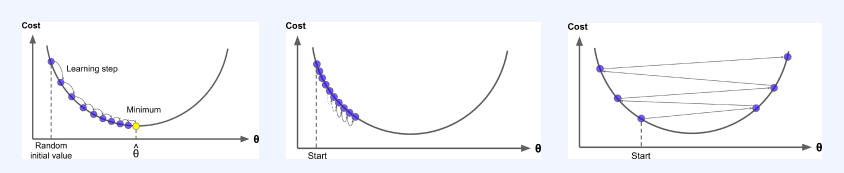

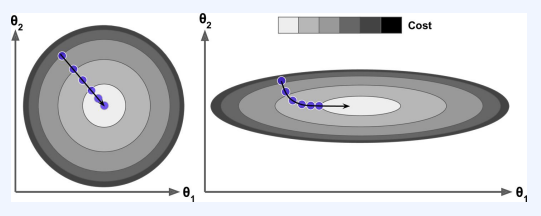

* fit_intercept : True/False 
  * 디폴트는 True
* normalize : True/False 
  * 디폴트는 False


### Titanic 요금 예측

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
df1 = df.copy()
df1.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)
df1.drop(['Name'], axis=1, inplace=True)
df_test.drop(['Name'], axis=1, inplace=True)

df_test.Cabin.astype(str)

# 결측치 처리
df1.Cabin.fillna('N', inplace=True)
df1.Embarked.fillna('S', inplace=True)
df1.Age.fillna(df1.Age.median(), inplace=True)
df_test.Cabin.fillna('N', inplace=True)
df_test.Fare.fillna(df1.Fare.median(), inplace=True)
df_test.Age.fillna(df1.Age.median(), inplace=True)

df1.Cabin = df1.Cabin.apply(lambda x:x[0])
df_test.Cabin = df_test.Cabin.apply(lambda x:x[0])

# 인코딩
og_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]
og_columns

for i in og_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    globals()[f'df_kg_{i}_encoder'] = LabelEncoder()
    globals()[f'df_kg_{i}_encoder'].fit(df_test[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
    df_test[i] = globals()[f'df_kg_{i}_encoder'].transform(df_test[i])

# X, y 분리
X = df1.drop('Survived', axis=1)
y = df1.Survived

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=19)

FileNotFoundError: ignored

In [ ]:
X = df1.drop('Fare', axis=1)
y = df1['Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=19)

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mean_squared_error(y_test, lr_pred)

0.11793607513281673

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mean_squared_error(y_test, lr_pred)

632.5965072896843

In [ ]:
lr.score(X_test, y_test)

0.5044026601090721

In [ ]:
lr.coef_

array([  3.82620594, -26.08100699,  -1.83685676,  -0.12343653,
         5.66489623,   9.7518885 ,   0.04258321,  -5.61952217,
        -6.98578488])

In [ ]:
lr.intercept_

118.98393553828868

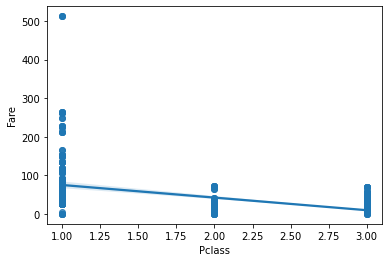

In [ ]:
sns.regplot('Pclass', 'Fare', data=df1)

### Bostion 주택가격 예측

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/boston_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ Encore Prac/boston_test_data.csv')

In [ ]:
X = df.drop('medv', axis=1)
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mean_squared_error(y_test, lr_pred)

26.831961437429637

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mean_squared_error(y_test, lr_pred)

26.831961437429698

In [ ]:
print("가중치(계수, 기울기 파라미터 W) :", lr.coef_)
print("편향(절편 파라미터 b) :", lr.intercept_)
print("훈련세트 점수: {:.2f}".format( lr.score(X_train, y_train) ))
print("테스트세트 점수: {:.2f}".format( lr.score(X_test, y_test) ))
print('MSE :', mean_squared_error(y_test, lr_pred))

가중치(계수, 기울기 파라미터 W) : [-1.18675632e-01  4.89083571e-02 -2.54842808e-02  1.24881127e+00
 -1.36760092e+01  3.71332730e+00 -9.95653992e-03 -1.47384785e+00
  2.72549447e-01 -1.30703523e-02 -9.14049949e-01  8.04610884e-03
 -4.96105247e-01]
편향(절편 파라미터 b) : 35.85473301825591
훈련세트 점수: 0.75
테스트세트 점수: 0.74
MSE : 26.831961437429698


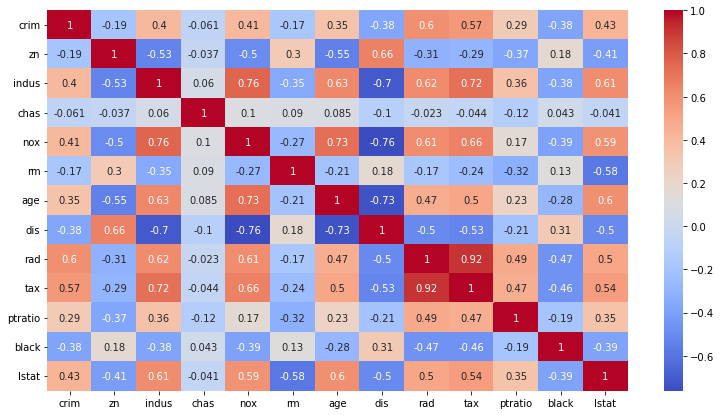

In [ ]:
plt.figure(figsize=(13,7))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

#### 다중공선성 (multi-collinearity)
 * 상관계수 확인
 * tolerance 확인 
   * R^2가 1이라면 독립변수 간에 심각한 상관관계가 있음을 의미
   * tolerance = 1- R^2
 * 분산팽창지수 (VIF)
  * VIF = 1/tolerance = 1/(1-R^2)
  * 10 보다 크면 위험

#### 해결책
* 애초에 일어나지 않게 독립변수를 잘 선택
* 비슷한 피쳐 삭제
* 차원축소(PCA, LDA)로 변수 재조합 (경우에 따라 이상한 결과)
* 릿지 리스레션
* mean centering

# 다항 회귀

### Bias(편향성) vs Variance(변동성)
 * Bias (= mse) :지도학습 알고리즘이 학습데이터 내 입력변수들과 출력변수의 관계를 잘 fitting 하지 못해 발생하는 오차
 * Variance : 학습데이터에 내재되어 있는 변동(fluctuation)에 의해 발생하는 오차, 학습데이터가 모집단을 대표할수 없기 때문에

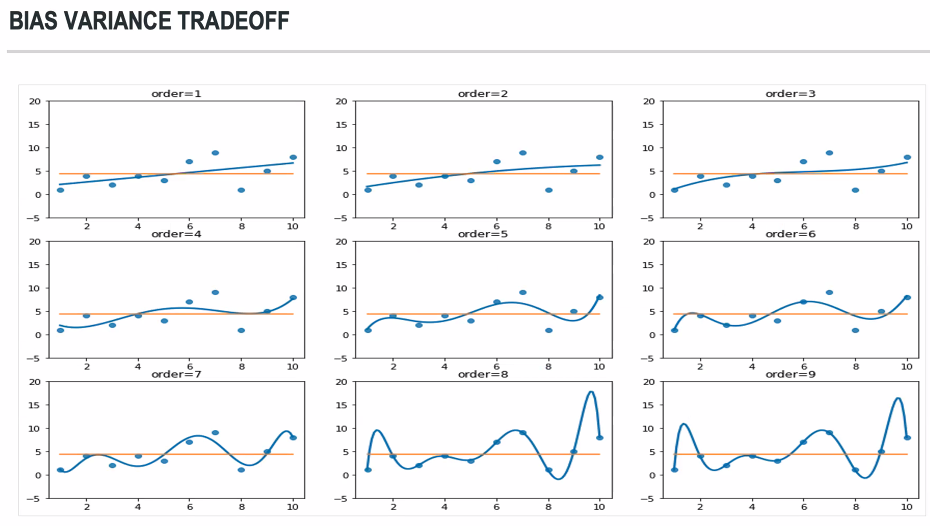

* Error = bias + variance + c

* 편향 감소 (Underfitting 모델인 경우)
 * 더 많은 피쳐 추가(파생변수 생성, 데이터 통합 등)
 * 세련된 알고리즘 사용(모델에 복잡성을 더한다)
* 분산 감소 (Overfitting 모델인 경우)
 * 더 적은 피쳐 사용
 * 더 많은 데이터 포인트 사용
 * 제약(regularization) 사용

### Regularization (규제)

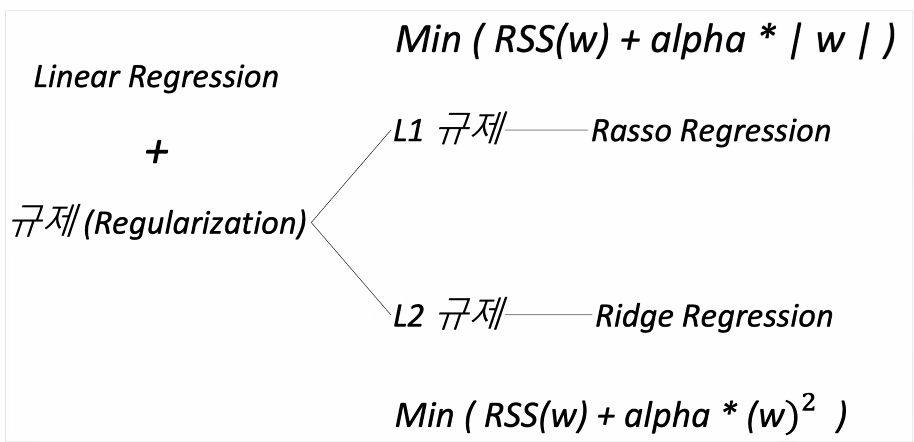

## Ridge / Lasso Regression

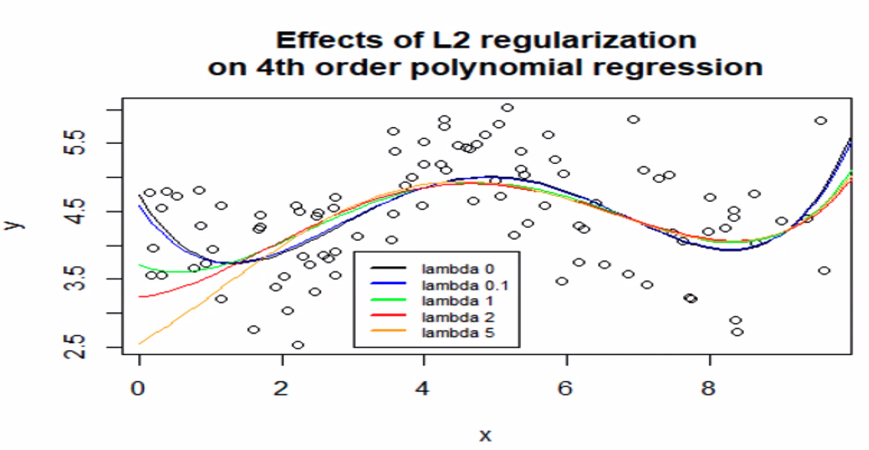

In [ ]:
X = df.drop(['medv','chas', 'rad'], axis=1)
y = df['medv']

In [ ]:
df_test.drop(['chas', 'rad'], axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_scaled = sc.transform(X)
df_test_scaled = sc.transform(df_test)

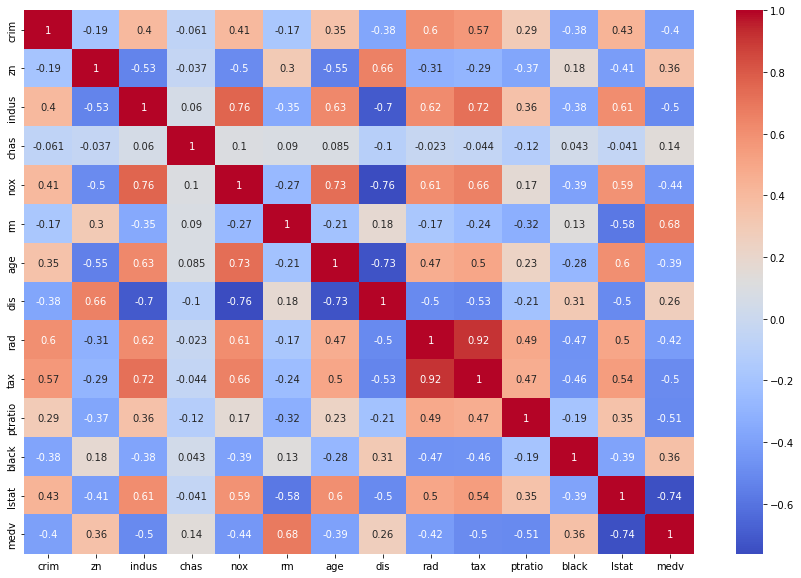

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_scaled)
df_test_poly = poly.fit_transform(df_test_scaled)
X_trn, X_val, y_trn, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=19)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_trn, y_trn)
lr_pred = lr.predict(X_val)
print('mse: ', mean_squared_error(y_val, lr_pred))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_trn, y_trn)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_val, y_val)))

mse:  38.22599157816192
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


In [ ]:
from sklearn.linear_model import Ridge
for i in [0, 5, 10, 15, 20, 30]:
  ridge = Ridge(alpha=i)
  ridge.fit(X_trn, y_trn)
  rg_pred = ridge.predict(X_val)
  print(f'alpha = {i}')
  print("가중치(계수, 기울기 파라미터 W) :",  ridge.coef_)
  print('mse:', mean_squared_error(y_val,    rg_pred ))
  print("훈련 세트 점수: {:.2f}".format( ridge.score(X_trn, y_trn)))
  print("테스트 세트 점수: {:.2f}".format( ridge.score(X_val, y_val)))
  print('-'*50)

alpha = 0
가중치(계수, 기울기 파라미터 W) : [ 0.00000000e+00 -1.31877126e-01  4.88058438e-02  3.51323967e-02
  3.40466010e+00 -1.35768297e+01  4.21091354e+00 -9.57174887e-03
 -1.31269125e+00  2.57344349e-01 -1.17391858e-02 -7.81903503e-01
  1.07573660e-02 -4.80627456e-01]
mse: 39.47975635758836
훈련 세트 점수: 0.79
테스트 세트 점수: 0.62
--------------------------------------------------
alpha = 5
가중치(계수, 기울기 파라미터 W) : [ 0.         -0.12628092  0.05001253 -0.00560074  2.36406476 -2.25782712
  4.2296388  -0.01928426 -1.13865007  0.23932909 -0.01290085 -0.66302013
  0.01237248 -0.50682124]
mse: 39.82209766294584
훈련 세트 점수: 0.79
테스트 세트 점수: 0.62
--------------------------------------------------
alpha = 10
가중치(계수, 기울기 파라미터 W) : [ 0.         -0.12579822  0.05175769 -0.0080605   1.88152411 -1.25043613
  3.99487076 -0.01836097 -1.13249436  0.24303324 -0.01325995 -0.66663227
  0.01234178 -0.52592012]
mse: 39.457005963427676
훈련 세트 점수: 0.78
테스트 세트 점수: 0.62
--------------------------------------------------
alpha = 15
가중치

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_trn, y_trn)
rd_pred = ridge.predict(X_val)
print(mean_squared_error(y_val, rd_pred))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_trn, y_trn)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_val, y_val)))

38.60250526385951
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


In [ ]:
ridge.fit(X_poly, y)
rd_pred = ridge.predict(df_test_poly)

result = pd.DataFrame([df_test.index, rd_pred ], index=['id', 'price']).T
result.id = result.id.astype('int64')
result.to_csv('submission.csv', index=False)

* alpha를 0부터 높이면서 각 변수들의 weight가 어떻게 변하는지 확인

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/boston_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ Encore Prac/boston_test_data.csv')

In [ ]:
X = df.drop('medv', axis=1)
y = df['medv']

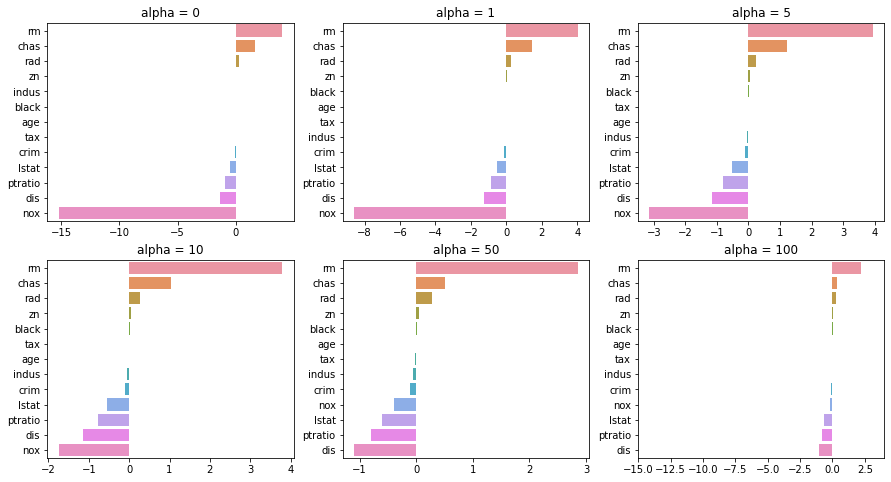

In [ ]:
from sklearn.linear_model import Ridge
fig = plt.figure(figsize=(15,8))
for i in range(6):
    globals()[f'ax{i+1}'] = fig.add_subplot(2, 3, i+1)
for idx, alpha in enumerate([0, 1, 5, 10, 50, 100]):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
     # feature별 importance 매핑
    f_i1 = {}
    f_i2 = {}
    for name, value in zip(X.columns, ridge.coef_) :
        f_i1[name] = value
        result1 = sorted(f_i1.items(), key=lambda x:x[1], reverse=True)
    for i, j in result1:
        f_i2[i] = j
    sns.barplot(x=list(f_i2.values()), y=list(f_i2.keys()), ax=globals()[f'ax{idx+1}'])
    globals()[f'ax{idx+1}'].set_title(f'alpha = {alpha}')
    plt.xlim(-15, 4)
plt.show()

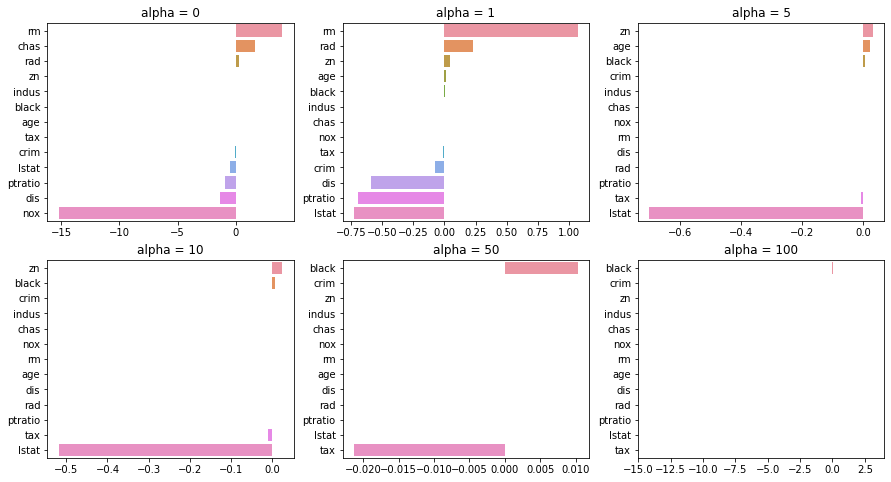

In [ ]:
from sklearn.linear_model import Lasso
fig = plt.figure(figsize=(15,8))
for i in range(6):
  globals()[f'ax{i+1}'] = fig.add_subplot(2, 3, i+1)
for idx, alpha in enumerate([0, 1, 5, 10, 50, 100]):
  lasso= Lasso(alpha=alpha)
  lasso.fit(X, y)
  f_i1 = {}
  f_i2 = {}
  for name, value in zip(X.columns, lasso.coef_) :
      f_i1[name] = value
      result1 = sorted(f_i1.items(), key=lambda x:x[1], reverse=True)
  for i, j in result1:
      f_i2[i] = j
  sns.barplot(x=list(f_i2.values()), y=list(f_i2.keys()), ax=globals()[f'ax{idx+1}'])
  globals()[f'ax{idx+1}'].set_title(f'alpha = {alpha}')
  plt.xlim(-15, 4)
plt.show()

## L2, L1 Norm

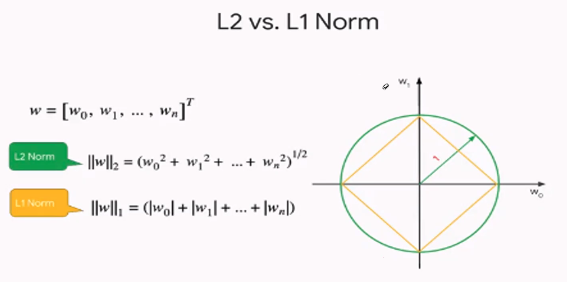

* default는 L2로 설정되어 있음

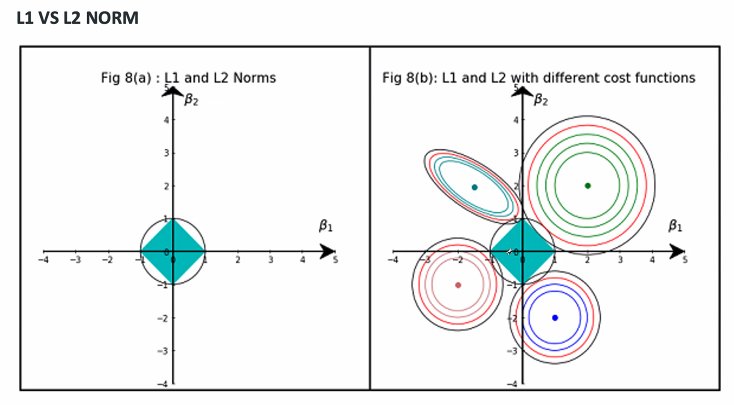

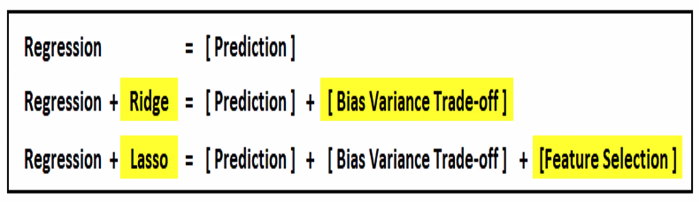

## Elasticnet

* L1 + L2
* parameter : alpha, l1_ration
* a*l1 + b*l2
* alpha = a+b
* l1_ratio = a/(a+b)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/boston_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ Encore Prac/boston_test_data.csv')

In [ ]:
X = df.drop('medv', axis=1)
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_scaled = sc.transform(X)
df_test_scaled = sc.transform(df_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
df_test_poly = poly.fit_transform(df_test_scaled)
X_trn, X_val, y_trn, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=19)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
df_test_poly = poly.fit_transform(df_test)
X_trn, X_val, y_trn, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=19)

In [ ]:
from sklearn.linear_model import Ridge
for i in [0, 5, 10, 15, 20, 30]:
  ridge = Ridge(alpha=i)
  ridge.fit(X_trn, y_trn)
  rg_pred = ridge.predict(X_val)
  print(f'alpha = {i}')
  print('mse:', mean_squared_error(y_val,   rg_pred ))
  print("훈련 세트 점수: {:.2f}".format(ridge.score(X_trn, y_trn)))
  print("테스트 세트 점수: {:.2f}".format(ridge.score(X_val, y_val)))
  print('-'*50)

alpha = 0
mse: 66.30501736111111
훈련 세트 점수: 0.95
테스트 세트 점수: 0.37
--------------------------------------------------
alpha = 5
mse: 31.455457125326625
훈련 세트 점수: 0.94
테스트 세트 점수: 0.70
--------------------------------------------------
alpha = 10
mse: 31.77358331637637
훈련 세트 점수: 0.93
테스트 세트 점수: 0.70
--------------------------------------------------
alpha = 15
mse: 32.31243246123832
훈련 세트 점수: 0.93
테스트 세트 점수: 0.69
--------------------------------------------------
alpha = 20
mse: 32.83615582599331
훈련 세트 점수: 0.93
테스트 세트 점수: 0.69
--------------------------------------------------
alpha = 30
mse: 33.76511279196248
훈련 세트 점수: 0.92
테스트 세트 점수: 0.68
--------------------------------------------------


In [ ]:
from sklearn.linear_model import Lasso
for i in [0, 0.5, 1, 3, 4, 5, 10, 15]:
  lasso = Lasso(alpha=i)
  lasso.fit(X_trn, y_trn)
  la_pred = lasso.predict(X_val)
  print(f'alpha = {i}')
  print('mse:', mean_squared_error(y_val, la_pred ))
  print("훈련 세트 점수: {:.2f}".format(lasso.score(X_trn, y_trn)))
  print("테스트 세트 점수: {:.2f}".format(lasso.score(X_val, y_val)))
  print('-'*50)

alpha = 0
mse: 62.141928724277584
훈련 세트 점수: 0.95
테스트 세트 점수: 0.41
--------------------------------------------------
alpha = 0.5
mse: 38.845997596771106
훈련 세트 점수: 0.85
테스트 세트 점수: 0.63
--------------------------------------------------
alpha = 1
mse: 37.418112127975924
훈련 세트 점수: 0.79
테스트 세트 점수: 0.64
--------------------------------------------------
alpha = 3
mse: 52.402545874482
훈련 세트 점수: 0.60
테스트 세트 점수: 0.50
--------------------------------------------------
alpha = 4
mse: 66.98479945046415
훈련 세트 점수: 0.44
테스트 세트 점수: 0.36
--------------------------------------------------
alpha = 5
mse: 86.8705429244737
훈련 세트 점수: 0.25
테스트 세트 점수: 0.17
--------------------------------------------------
alpha = 10
mse: 105.13934864319866
훈련 세트 점수: 0.02
테스트 세트 점수: 0.00
--------------------------------------------------
alpha = 15
mse: 105.5054267666306
훈련 세트 점수: 0.00
테스트 세트 점수: -0.00
--------------------------------------------------


In [ ]:
from sklearn.linear_model import ElasticNet
for i in [0, 1, 5, 10, 15, 20, 30]:
  ela = ElasticNet(alpha=i, l1_ratio=0.2)
  ela.fit(X_trn, y_trn)
  ela_pred = ela.predict(X_val)
  print(f'alpha = {i}')
  print('mse:', mean_squared_error(y_val, ela_pred ))
  print("훈련 세트 점수: {:.2f}".format(ela.score(X_trn, y_trn)))
  print("테스트 세트 점수: {:.2f}".format(ela.score(X_val, y_val)))
  print('-'*50)

alpha = 0
mse: 62.141928724277584
훈련 세트 점수: 0.95
테스트 세트 점수: 0.41
--------------------------------------------------
alpha = 1
mse: 42.989200309310824
훈련 세트 점수: 0.82
테스트 세트 점수: 0.59
--------------------------------------------------
alpha = 5
mse: 59.80927666801184
훈련 세트 점수: 0.55
테스트 세트 점수: 0.43
--------------------------------------------------
alpha = 10
mse: 78.53709928463138
훈련 세트 점수: 0.34
테스트 세트 점수: 0.25
--------------------------------------------------
alpha = 15
mse: 89.99366342380497
훈련 세트 점수: 0.22
테스트 세트 점수: 0.14
--------------------------------------------------
alpha = 20
mse: 97.2115712095349
훈련 세트 점수: 0.13
테스트 세트 점수: 0.08
--------------------------------------------------
alpha = 30
mse: 104.07456114026242
훈련 세트 점수: 0.04
테스트 세트 점수: 0.01
--------------------------------------------------


In [ ]:
ela = ElasticNet(alpha=0.1, l1_ratio=0)
ela.fit(X_trn, y_trn)
ela.fit(X_poly, y)
ela_pred = ela.predict(df_test_poly)

result = pd.DataFrame([df_test.index, ela_pred ], index=['id', 'price']).T
result.id = result.id.astype('int64')
result.to_csv('submission.csv', index=False)

In [ ]:
lasso = Lasso(alpha=1)
lasso.fit(X_trn, y_trn)
lasso.fit(X_poly, y)
la_pred = lasso.predict(df_test_poly)

result = pd.DataFrame([df_test.index, la_pred], index=['id', 'price']).T
result.id = result.id.astype('int64')
result.to_csv('submission.csv', index=False)

# Logistic Regression

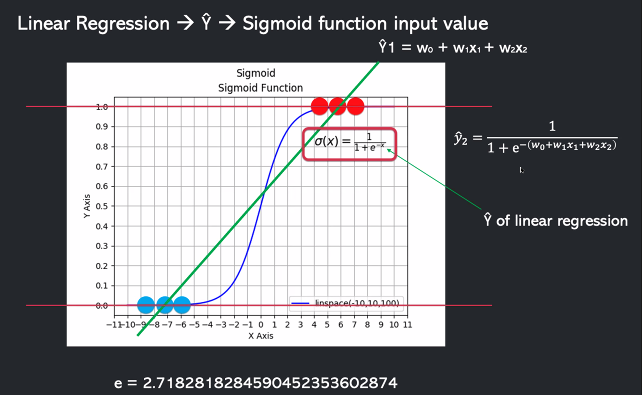

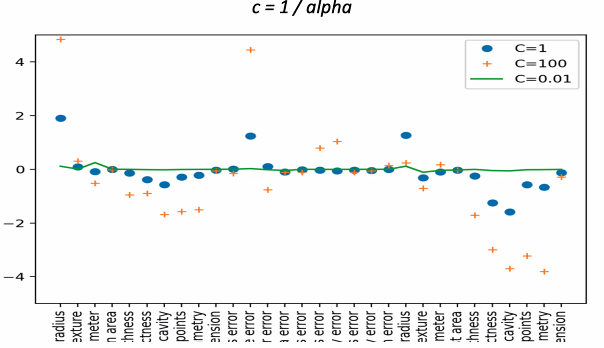

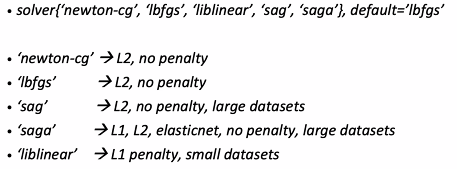

In [3]:
# 데이터 준비
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
from sklearn.model_selection import train_test_split

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, stratify=fish_target, random_state=42)

In [20]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train_input)
train_scaled = sc.transform(train_input)
test_scaled = sc.transform(test_input)

* K 최근접 이웃으로 다중 분류

In [22]:
# k 최근접 이웃의 다중 분류
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target) 
# Sklearn에서 타깃값을 문자열 -> 정수로 자동변경해서 계산해줌

print(kn.classes_) # 속성확인

print(kn.predict(test_scaled[:5])) # 5개 샘플 예측(문자열로 변경되어 출력)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Perch' 'Roach' 'Parkki' 'Parkki']


In [9]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) # 확률 확인
print(np.round(proba, decimals=4)) 

[[0.     0.     0.3333 0.     0.6667 0.     0.    ]
 [0.     0.     0.3333 0.     0.6667 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     1.     0.     0.     0.     0.     0.    ]
 [0.     1.     0.     0.     0.     0.     0.    ]]


* 단점 => 확률값이 단순하게(일정하게) 나온다.

* 로지스틱 회귀
 * z = a*무게 + b*길이 + c*대각선 + d*높이 + e*높이 + e*두께 +f
 * Sigmoid 함수, 로지스틱 함수

* 이진분류

In [10]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target =='Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']
[[9.76263188e-01 2.37368125e-02]
 [9.99614480e-01 3.85519926e-04]
 [9.94438266e-01 5.56173414e-03]
 [9.09188993e-01 9.08110069e-02]
 [9.99361521e-01 6.38479331e-04]]


In [12]:
print(lr.coef_, lr.intercept_) # 가중치와 절편 출력

[[-0.4235112  -0.61604834 -0.70216369 -0.97498265 -0.7403996 ]] [-2.46732659]


In [13]:
# z 값 출력 (양성클래스에 대한 값만 선택)
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-3.7167051  -7.86053208 -5.18626807 -2.30377249 -7.35578257]


In [14]:
# z값을 sigmoid 함수에 넣어 출력
from scipy.special import expit
print(expit(decisions))

[0.02373681 0.00038552 0.00556173 0.09081101 0.00063848]


* 다중 분류
 * 2진 분류를 여러번 실행(OvR : One vs Rest)

In [15]:
lr = LogisticRegression(C=20, max_iter=1000)
# max_iter : 반복횟수(default=100),
# C : L2규제 강도(defalut=1, 숫자와 규제는 반비례)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9243697478991597
0.925


In [16]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.001 0.017 0.343 0.007 0.575 0.002 0.056]
 [0.    0.015 0.647 0.002 0.281 0.001 0.053]
 [0.    0.028 0.645 0.002 0.282 0.004 0.039]
 [0.014 0.838 0.003 0.    0.098 0.    0.046]
 [0.004 0.761 0.012 0.    0.17  0.001 0.051]]


In [17]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


* SoftMax 함수

In [18]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[-3.66 -0.23  2.8  -1.09  3.32 -2.12  0.98]
 [-3.54  0.11  3.87 -1.78  3.04 -3.08  1.38]
 [-4.75  0.6   3.72 -2.05  2.89 -1.31  0.91]
 [ 0.39  4.47 -1.11 -3.74  2.33 -3.91  1.57]
 [-1.33  3.9  -0.29 -3.5   2.4  -2.38  1.2 ]]


In [19]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, 3))

[[0.001 0.017 0.343 0.007 0.575 0.002 0.056]
 [0.    0.015 0.647 0.002 0.281 0.001 0.053]
 [0.    0.028 0.645 0.002 0.282 0.004 0.039]
 [0.014 0.838 0.003 0.    0.098 0.    0.046]
 [0.004 0.761 0.012 0.    0.17  0.001 0.051]]
